In [1]:
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
slibt = pq.read_table('HoGentOnlineMetingenSlibAntwerpenZuid.parquet')

In [3]:
import pandas as pd
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1500)

In [4]:
slib = slibt.to_pandas()
slib.shape

(1051200, 53)

In [5]:
slib.head()

,HT1_16199,HT_06410,HT_12498,HT_16140,HT_16141,HT_16142,HT_16154,HT_16158,HT_16162,HT_16172,HT_16176,HT_16183,HT_16184,HT_16185,HT_16201,HT_16202,HT_16203,HT_16503,HT_16504,HT_16514,HT_16515,HT_16560,HT_16562,HT_16563,HT_16564,HT_16581,HT_16582,HT_16583,HT_16584,HT_16585,HT_16586,HT_16587,HT_16590,HT_16618,HT_16671,HT_16673,HT_16676,HT_16806,HT_168061,HT_16860,HT_16861,HT_16877,HT_16880,HT_16885,HT_16893,HT_16894,HT_16895,HT_16896,HT_16899,HT_6210,HT_6310,HT_A16503,HT_A16504
,m³ Niveau buffer voor gisting (F_CV),kg/h Berekende slibdoorzet indiktafel3 (F_CV),g/l Slibconcentratie beluchting 3 (F_CV),% droge stof meting (F_CV),% droge stof meting (F_CV),% droge stof meting (F_CV),L/h Debiet PE naar indiktafel 1 (F_CV),L/h Debiet PE naar indiktafel 2 (F_CV),L/h Debiet PE naar indiktafel 3 (F_CV),m³/h Debiet spuislib (F_CV),cm Niv slibbuffer voor indikking (F_CV),m³/h Debiet slib indiktafel 1 (F_CV),m³/h Debiet slib indiktafel 2 (F_CV),m³/h Debiet slib indiktafel 3 (F_CV),m³/h Debiet voeding slibgisting (F_CV),°C Temperatuur voeding slib (F_CV),% Droge stof voeding slibgisting (F_CV),kW Vermogen Circulatiepomp 1 gisting (F_CV),kW Vermogen Circulatiepomp 2 gisting (F_CV),A Stroom Mixer 1 buffer na gisting (F_CV),A Stroom Mixer 2 buffer na gisting (F_CV),°C Temperatuur buffer naar gisti (F_CV),m³/h Debiet slibcirculatie gisting (F_CV),°C Temperatuur na warmtewisselaar (F_CV),cm Niveaumeting schuimhoogte (F_CV),% droge stof meting (F_CV),% droge stof meting (F_CV),°C Temp voor WW (F_CV),°C Temp toevoer gisting (F_CV),% droge stof meting (F_CV),bar Druk gistingstank (F_CV),°C Temperatuur gistingstank (F_CV),cm Niveau slibbuffer na gisting (F_CV),kW Vermogen Gasomwalscompressor 2 (F_CV),mbar drukmeting gasproductie (F_CV),Nm³/h Debiet gasproductie (F_CV),% Methaangas gehalte (F_CV),kW Geleverd vermogen gasmotor (F_CV),kW Opgenomen vermogen uit net (F_CV),°C Temperatuur CV naar warmtewis. (F_CV),m³/h Debiet cv warmtewisselaar (F_CV),°C Temperatuur warm water (F_CV),°C Temperatuur warmtewisselaar (F_CV),°C Temperatuur koud water (F_CV),m³/h Debiet biogas storing motor (F_CV),m³/h Debiet biogas fakkel (F_CV),m³/h Debiet biogas / brander (F_CV),m³/h Debiet biogas motor (F_CV),m³/h Debiet aargas brander (F_CV),kg/h Berekende slibdoorzet indiktafel1 (F_CV),kg/h Berekende slibdoorzet indiktafel2 (F_CV),% Aansturing Circulatiepomp 1 gisting (F_CV),% Aansturing Circulatiepomp 2 gisting (F_CV)
Tijdsas,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-01 00:00:00+01:00,40.0,-1.0,3.809998,0.820007,0.0,0.149994,523.0,0.0,0.0,183.5,221.0,36.0,0.0,0.0,562.0,15.803325,5.009995,13.0,0.0,0.0,0.0,15.369995,68.029984,48.549988,4.339996,9.079987,2.519989,42.079987,46.269989,4.440002,16.879984,44.602501,129.0,0.0,1025.0,107.5,63.809998,272.000000,62.0,70.539978,15.863322,76.449982,54.320007,54.160004,0.0,0.0,0.0,137.5,0.0,301.666656,-1.0,56.0,0.0
2018-12-01 00:00:30+01:00,40.0,-1.0,3.829987,0.820007,0.0,0.160004,508.0,0.0,0.0,184.0,225.0,37.0,0.0,0.0,304.0,15.799988,5.029999,13.0,0.0,0.0,0.0,15.360001,68.079987,48.540009,4.339996,9.179993,2.489990,42.083324,46.350006,4.339996,16.869986,44.604996,129.0,0.0,1025.5,106.0,63.799988,271.666656,66.0,70.449982,15.859985,76.359985,54.299988,54.169983,0.0,0.0,0.0,137.0,0.0,303.000000,-1.0,56.0,0.0
2018-12-01 00:01:00+01:00,40.0,-1.0,3.779999,0.829987,0.0,0.160004,518.0,0.0,0.0,184.5,226.0,37.0,0.0,0.0,334.0,15.809998,5.049988,13.0,0.0,0.0,0.0,15.350006,68.029999,48.535004,4.339996,9.040009,2.519989,42.086658,46.220001,4.380005,16.859985,44.607491,129.0,0.0,1026.0,104.0,63.779999,271.333344,70.0,70.380005,15.854996,76.259979,54.269989,54.149994,0.0,0.0,0.0,136.0,0.0,299.000000,-1.0,56.0,0.0
2018-12-01 00:01:30+01:00,40.0,-1.0,3.709991,0.829987,0.0,0.149994,548.0,0.0,0.0,185.0,228.0,36.0,0.0,0.0,476.0,15.804993,5.000000,13.0,0.0,0.0,0.0,15.345001,68.000000,48.529999,4.339996,9.059998,2.529999,42.089996,46.269989,4.489990,16.864990,44.609985,129.0,0.0,1025.0,105.5,63.769989,271.000000,74.0,70.309998,15.850006

In [6]:
#Nodig: Table HT_16183 / 16184 / 16185 | 16154 16158 16162 (input)
# 16172
# 16587(temp) / 16562 (m3/h) / HT_16618(kW)
#output: HT_16673: Nm³/h Debiet gasproductie/ HT_16676: %Methaangas gehalte
slibNodig = slib[['HT_16183', 'HT_16184', 'HT_16185', 'HT_16154', 'HT_16158', 'HT_16162', 'HT_16172', 'HT_16587', 'HT_16562', 'HT_16618',
                 'HT_16673', 'HT_16676']]
print(slibNodig.columns)

MultiIndex([('HT_16183',      'm³/h       Debiet slib indiktafel 1 (F_CV)'),
            ('HT_16184',      'm³/h       Debiet slib indiktafel 2 (F_CV)'),
            ('HT_16185',      'm³/h       Debiet slib indiktafel 3 (F_CV)'),
            ('HT_16154',   'L/h        Debiet PE naar indiktafel 1 (F_CV)'),
            ('HT_16158',   'L/h        Debiet PE naar indiktafel 2 (F_CV)'),
            ('HT_16162',   'L/h        Debiet PE naar indiktafel 3 (F_CV)'),
            ('HT_16172',               'm³/h       Debiet spuislib (F_CV)'),
            ('HT_16587',      '°C         Temperatuur gistingstank (F_CV)'),
            ('HT_16562', 'm³/h       Debiet slibcirculatie gisting (F_CV)'),
            ('HT_16618',    'kW     Vermogen Gasomwalscompressor 2 (F_CV)'),
            ('HT_16673',          'Nm³/h       Debiet gasproductie (F_CV)'),
            ('HT_16676',               '%       Methaangas gehalte (F_CV)')],
           )


In [7]:
slibNodig.head(5)

,HT_16183,HT_16184,HT_16185,HT_16154,HT_16158,HT_16162,HT_16172,HT_16587,HT_16562,HT_16618,HT_16673,HT_16676
,m³/h Debiet slib indiktafel 1 (F_CV),m³/h Debiet slib indiktafel 2 (F_CV),m³/h Debiet slib indiktafel 3 (F_CV),L/h Debiet PE naar indiktafel 1 (F_CV),L/h Debiet PE naar indiktafel 2 (F_CV),L/h Debiet PE naar indiktafel 3 (F_CV),m³/h Debiet spuislib (F_CV),°C Temperatuur gistingstank (F_CV),m³/h Debiet slibcirculatie gisting (F_CV),kW Vermogen Gasomwalscompressor 2 (F_CV),Nm³/h Debiet gasproductie (F_CV),% Methaangas gehalte (F_CV)
Tijdsas,,,,,,,,,,,,
2018-12-01 00:00:00+01:00,36.0,0.0,0.0,523.0,0.0,0.0,183.5,44.602501,68.029984,0.0,107.5,63.809998
2018-12-01 00:00:30+01:00,37.0,0.0,0.0,508.0,0.0,0.0,184.0,44.604996,68.079987,0.0,106.0,63.799988
2018-12-01 00:01:00+01:00,37.0,0.0,0.0,518.0,0.0,0.0,184.5,44.607491,68.029999,0.0,104.0,63.779999
2018-12-01 00:01:30+01:00,36.0,0.0,0.0,548.0,0.0,0.0,185.0,44.609985,68.000000,0.0,105.5,63.769989
2018-12-01 00:02:00+01:00,38.0,0.0,0.0,531.0,0.0,0.0,184.0,44.600006,67.940002,0.0,107.0,63.759979


In [8]:
slibNodig.shape

(1051200, 12)

In [9]:
slibNodig.columns = slibNodig.columns.get_level_values(0)
slibNodig.head(5)

,HT_16183,HT_16184,HT_16185,HT_16154,HT_16158,HT_16162,HT_16172,HT_16587,HT_16562,HT_16618,HT_16673,HT_16676
Tijdsas,,,,,,,,,,,,
2018-12-01 00:00:00+01:00,36.0,0.0,0.0,523.0,0.0,0.0,183.5,44.602501,68.029984,0.0,107.5,63.809998
2018-12-01 00:00:30+01:00,37.0,0.0,0.0,508.0,0.0,0.0,184.0,44.604996,68.079987,0.0,106.0,63.799988
2018-12-01 00:01:00+01:00,37.0,0.0,0.0,518.0,0.0,0.0,184.5,44.607491,68.029999,0.0,104.0,63.779999
2018-12-01 00:01:30+01:00,36.0,0.0,0.0,548.0,0.0,0.0,185.0,44.609985,68.000000,0.0,105.5,63.769989
2018-12-01 00:02:00+01:00,38.0,0.0,0.0,531.0,0.0,0.0,184.0,44.600006,67.940002,0.0,107.0,63.759979


In [10]:
#Renaming columns and setting the totals for research purposes
slibNodig['TotaalSlibOpTafels'] = slibNodig['HT_16183']+slibNodig['HT_16184']+slibNodig['HT_16185']
slibNodig = slibNodig.drop(['HT_16183', 'HT_16184', 'HT_16185'], axis=1)
slibNodig['TotaalPENaarTafels'] = slibNodig['HT_16154']+slibNodig['HT_16158']+slibNodig['HT_16162']
slibNodig = slibNodig.drop(['HT_16154', 'HT_16158', 'HT_16162'], axis=1)

slibNodig['DebietSpuiSlib'] = slibNodig['HT_16172']
slibNodig = slibNodig.drop('HT_16172', axis=1)

slibNodig['TemperatuurTank'] = slibNodig['HT_16587']
slibNodig = slibNodig.drop('HT_16587', axis=1)

slibNodig['DebietSlibCirculatie'] = slibNodig['HT_16562']
slibNodig = slibNodig.drop('HT_16562', axis=1)

slibNodig['VermogenCompressor'] = slibNodig['HT_16618']
slibNodig = slibNodig.drop('HT_16618', axis=1)

slibNodig['DebietGasproductie'] = slibNodig['HT_16673']
slibNodig = slibNodig.drop('HT_16673', axis=1)

slibNodig['MethaangasGehalte'] = slibNodig['HT_16676']
slibNodig = slibNodig.drop('HT_16676', axis=1)


C:\Users\bramv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
slibWerkbaar = slibNodig

In [12]:
slibWerkbaar = slibWerkbaar[slibWerkbaar.TemperatuurTank != 0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.TotaalSlibOpTafels>0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.TotaalPENaarTafels>=0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.DebietSpuiSlib>=0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.VermogenCompressor >= 0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.DebietSlibCirculatie>0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.DebietGasproductie>0]
slibWerkbaar = slibWerkbaar[slibWerkbaar.MethaangasGehalte>0]

In [13]:
#480: 30 sec per rij -> 240 minuten -> 4u en daarom 6 * 480 = 24u aan rijen
amountOfDays = 9
timeToShift = amountOfDays * 6 * 480
#slibWerkbaar['DebietSpuiSlibShift9D'] = slibNodig.DebietSpuiSlib.shift(-timeToShift)
slibWerkbaar = slibWerkbaar.drop(['DebietSpuiSlib'], axis=1)
slibWerkbaar['TotaalSlibOpTafels9D'] = slibNodig.TotaalSlibOpTafels.shift(-timeToShift)
slibWerkbaar['TotaalPENaarTafels9D'] = slibNodig.TotaalPENaarTafels.shift(-timeToShift)
slibWerkbaar['TemperatuurTank9D'] = slibNodig.TemperatuurTank.shift(-timeToShift)
slibWerkbaar['VermogenCompressor9D'] = slibNodig.VermogenCompressor.shift(-timeToShift)
slibWerkbaar['DebietSlibCirculatie9D'] = slibNodig.DebietSlibCirculatie.shift(-timeToShift)

In [14]:
slibWerkbaar = slibWerkbaar.dropna()

In [15]:
slibWerkbaar.describe()

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
count,855643.000000,855643.000000,855643.000000,855643.000000,855643.000000,8.556430e+05,855643.000000,8.556430e+05,8.556430e+05,855643.000000,8.556430e+05,8.556430e+05
mean,65.856389,941.680661,44.989404,67.926626,5.106545,1.080395e+02,64.027722,5.525632e+01,7.843944e+02,45.020703,5.044617e+00,6.787024e+01
std,24.905926,409.593839,1.479508,1.509734,10.868321,4.047628e+01,1.233729,3.275246e+01,5.052886e+02,1.704694,1.084089e+01,2.580384e+00
min,1.000000,0.000000,35.500000,0.190002,0.000000,7.105427e-15,42.266663,-3.552714e-15,-2.842171e-14,0.000000,-3.552714e-15,-7.105427e-15
25%,47.000000,629.375000,44.275583,67.799988,0.000000,7.800000e+01,63.489990,4.000000e+01,5.150000e+02,44.239990,0.000000e+00,6.781000e+01
50%,61.000000,805.250000,45.089996,68.000000,0.000000,1.030000e+02,64.089996,5.600000e+01,7.190000e+02,45.100006,0.000000e+00,6.800000e+01
75%,77.000000,1212.000000,45.910004,68.179993,0.000000,1.340000e+02,64.750000,7.200000e+01,1.098000e+03,46.009979,0.000000e+00,6.817999e+01
max,185.000000,3378.000000,50.619995,116.169983,60.000000,6.960000e+02,68.139984,1.850000e+02,3.378000e+03,50.639984,6.100000e+01,9.725998e+01


In [16]:
stdDebietGasprod = slibWerkbaar['DebietGasproductie'].std()
slibWerkbaar = slibWerkbaar[((slibWerkbaar.DebietGasproductie - slibWerkbaar.DebietGasproductie.mean()) / stdDebietGasprod).abs() < 3]



In [17]:
slibWerkbaar.describe()

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
count,853409.000000,853409.000000,853409.000000,853409.000000,853409.000000,8.534090e+05,853409.000000,8.534090e+05,8.534090e+05,853409.000000,8.534090e+05,8.534090e+05
mean,65.833053,941.169090,44.990583,67.926599,5.075095,1.074026e+02,64.027893,5.526591e+01,7.844430e+02,45.020711,5.048438e+00,6.787029e+01
std,24.900095,409.458076,1.479692,1.510966,10.844025,3.758332e+01,1.234224,3.274549e+01,5.051743e+02,1.705232,1.084433e+01,2.582052e+00
min,1.000000,0.000000,35.500000,0.190002,0.000000,7.105427e-15,42.266663,-3.552714e-15,-2.842171e-14,0.000000,-3.552714e-15,-7.105427e-15
25%,47.000000,629.000000,44.279999,67.799988,0.000000,7.800000e+01,63.489990,4.000000e+01,5.150000e+02,44.239990,0.000000e+00,6.781000e+01
50%,61.000000,805.000000,45.089996,68.000000,0.000000,1.030000e+02,64.089996,5.600000e+01,7.190000e+02,45.100006,0.000000e+00,6.800000e+01
75%,77.000000,1211.000000,45.910004,68.179993,0.000000,1.335000e+02,64.750000,7.200000e+01,1.098000e+03,46.009979,0.000000e+00,6.817999e+01
max,185.000000,3378.000000,50.619995,116.169983,60.000000,2.290000e+02,68.139984,1.850000e+02,3.378000e+03,50.639984,6.100000e+01,9.725998e+01


In [18]:
#slibWerkbaar = slibWerkbaar.round(4)

In [19]:
#tijdsas = slibNodig.index.values.tolist()
#new_tijdsas = tijdsas[:-51840]

#totSlibArr = slibNodig.TotaalSlibOpTafels.tolist()
#totPetArr = slibNodig.TotaalPENaarTafels.tolist()
#debietSpuiArr= slibNodig.DebietSpuiSlib.tolist()
#tempTankArr= slibNodig.TemperatuurTank.tolist()
#debSlibCircArr= slibNodig.DebietSlibCirculatie.tolist()
#vermogenCompArr= slibNodig.VermogenCompressor.tolist()
#inputs
#n amount of days * 6 * 480 = 51840
#new_totSlibArr = totSlibArr[:-51840]
#new_totPetArr = totPetArr[:-51840]
#new_debietSpuiArr = debietSpuiArr[:-51840]
#new_tempTankArr = tempTankArr[:-51840]
#new_debSlibCircArr = debSlibCircArr[:-51840]
#new_vermogenCompArr = vermogenCompArr[:-51840]

#outputs
#debietGasProdArr= slibNodig.DebietGasproductie.tolist()
#methaangasGehalteArr= slibNodig.MethaangasGehalte.tolist()

#new_debietGasProdArr = debietGasProdArr[51840:]
#new_methaangasGehalteArr = methaangasGehalteArr[51840:]

In [20]:
#slibWerkbaar = pd.DataFrame.from_records([new_tijdsas, new_totSlibArr,new_totPetArr,new_debietSpuiArr,new_tempTankArr,new_debSlibCircArr,new_vermogenCompArr,new_debietGasProdArr,new_methaangasGehalteArr])
#slibWerkbaar = slibWerkbaar.transpose()
#slibWerkbaar.columns=['Tijdsas', 'TotalSlibOnTable', 'TotalPEToTable', 'DebietSpuiSlib', 'TemperatuurTank', 'DebietSlibCirculatie', 'VermogenCompressor', 'DebietGasproductie', 'MethaangasGehalte']

In [21]:
slibWerkbaar.describe()

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
count,853409.000000,853409.000000,853409.000000,853409.000000,853409.000000,8.534090e+05,853409.000000,8.534090e+05,8.534090e+05,853409.000000,8.534090e+05,8.534090e+05
mean,65.833053,941.169090,44.990583,67.926599,5.075095,1.074026e+02,64.027893,5.526591e+01,7.844430e+02,45.020711,5.048438e+00,6.787029e+01
std,24.900095,409.458076,1.479692,1.510966,10.844025,3.758332e+01,1.234224,3.274549e+01,5.051743e+02,1.705232,1.084433e+01,2.582052e+00
min,1.000000,0.000000,35.500000,0.190002,0.000000,7.105427e-15,42.266663,-3.552714e-15,-2.842171e-14,0.000000,-3.552714e-15,-7.105427e-15
25%,47.000000,629.000000,44.279999,67.799988,0.000000,7.800000e+01,63.489990,4.000000e+01,5.150000e+02,44.239990,0.000000e+00,6.781000e+01
50%,61.000000,805.000000,45.089996,68.000000,0.000000,1.030000e+02,64.089996,5.600000e+01,7.190000e+02,45.100006,0.000000e+00,6.800000e+01
75%,77.000000,1211.000000,45.910004,68.179993,0.000000,1.335000e+02,64.750000,7.200000e+01,1.098000e+03,46.009979,0.000000e+00,6.817999e+01
max,185.000000,3378.000000,50.619995,116.169983,60.000000,2.290000e+02,68.139984,1.850000e+02,3.378000e+03,50.639984,6.100000e+01,9.725998e+01


In [22]:
#slibWerkbaar.Tijdsas = pd.to_datetime(slibWerkbaar.Tijdsas)

In [23]:
slibWerkbaar.head(5)

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
Tijdsas,,,,,,,,,,,,
2018-12-01 00:00:00+01:00,36.0,523.0,44.602501,68.029984,0.0,107.5,63.809998,0.0,1.0,45.329987,0.0,67.979980
2018-12-01 00:00:30+01:00,37.0,508.0,44.604996,68.079987,0.0,106.0,63.799988,0.0,0.0,45.139984,0.0,68.029999
2018-12-01 00:01:00+01:00,37.0,518.0,44.607491,68.029999,0.0,104.0,63.779999,0.0,0.0,44.959991,0.0,68.039978
2018-12-01 00:01:30+01:00,36.0,548.0,44.609985,68.000000,0.0,105.5,63.769989,0.0,0.0,45.339996,0.0,68.119995
2018-12-01 00:02:00+01:00,38.0,531.0,44.600006,67.940002,0.0,107.0,63.759979,0.0,0.0,45.459991,0.0,68.179993


In [24]:
#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.DebietGasproductie, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Hoeveelheid gegenereerd biomethaan')
#plt.show()
#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.TotalSlibOnTable, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Hoeveelheid slib op tafels')
#plt.show()

#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.TotalPEToTable, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Hoeveelheid PE naar tafels')
#plt.show()

#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.DebietSpuiSlib, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Hoeveelheid spuislib')
#plt.show()

#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.TemperatuurTank, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Temperatuur gistingstank')
#plt.show()

#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.DebietSlibCirculatie, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Slibcirculatie gisting')
#plt.show()

#plt.scatter(slibWerkbaar.Tijdsas, slibWerkbaar.VermogenCompressor, s=1)

#plt.xlabel('Tijdsas')
#plt.ylabel('Gasomwalscompressor')
#plt.show()

#plt.scatter(slibWerkbaar.DebietGasproductie, slibWerkbaar.TotalSlibOnTable, s=1)

#plt.xlabel('methaan')
#plt.ylabel('totaal slib')
#plt.show()

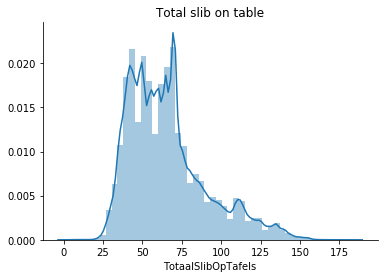

In [25]:
#REMOVAL OF OUTLIERS
sns.distplot(slibWerkbaar['TotaalSlibOpTafels'])
plt.title("Total slib on table")
sns.despine()


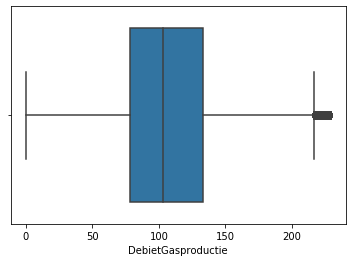

In [26]:
sns.boxplot(slibWerkbaar.DebietGasproductie)

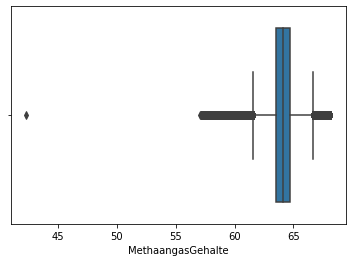

In [27]:
sns.boxplot(slibWerkbaar.MethaangasGehalte)

In [28]:
slibWerkbaar[slibWerkbaar['MethaangasGehalte'] > 66]

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
Tijdsas,,,,,,,,,,,,
2018-12-10 12:37:00+01:00,63.0,797.0,46.070007,67.949982,26.0,70.0,66.009979,39.0,527.500000,44.504990,0.0,68.049988
2018-12-10 12:37:30+01:00,64.0,805.5,46.009979,68.039978,26.0,68.0,66.019989,36.0,518.000000,44.500000,0.0,67.889984
2018-12-10 12:38:00+01:00,64.0,811.5,45.979980,68.029999,26.0,70.0,66.029999,42.0,507.000000,44.504990,0.0,67.970001
2018-12-10 12:38:30+01:00,63.0,825.0,45.880005,68.009979,26.0,73.0,66.049988,40.0,535.333333,44.509979,0.0,68.014999
2018-12-10 12:39:00+01:00,64.0,797.0,45.739990,67.979980,26.0,74.0,66.059998,43.0,536.666667,44.500000,0.0,68.059998
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-10 15:33:00+02:00,84.0,1052.0,42.829987,68.350006,0.0,101.0,66.014984,79.0,1786.000000,43.729980,30.0,67.789978
2019-10-10 15:33:30+02:00,91.0,1145.0,42.839996,67.759979,0.0,104.0,66.009979,79.0,1809.000000,43.739990,29.0,67.850006
2019-10-18 09:58:30+02:00,108.0,1626.0,44.239990,67.919983,0.0,110.0,66.009979,0.0,0.000000,44.549988,29.0,68.039978


In [29]:
slibWerkbaar[slibWerkbaar['DebietGasproductie'] > 200]

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
Tijdsas,,,,,,,,,,,,
2018-12-01 06:32:00+01:00,42.0,516.500000,44.850006,68.019989,0.0,204.5,63.509979,0.0,0.75,46.419983,26.0,68.059998
2018-12-02 11:02:00+01:00,30.0,700.666667,45.410004,68.339996,27.0,211.0,64.209991,81.0,1025.00,45.029999,0.0,68.029999
2018-12-03 10:58:00+01:00,81.0,1386.000000,45.399994,68.089996,0.0,204.0,64.940002,86.0,1017.00,44.729980,0.0,68.039978
2018-12-03 15:57:00+01:00,27.0,716.500000,45.274994,68.009979,27.0,205.0,62.399994,66.0,1049.00,44.634995,0.0,68.169983
2018-12-03 15:57:30+01:00,27.0,694.000000,45.259979,67.910004,27.0,215.0,62.429993,66.0,1053.00,44.649994,0.0,67.910004
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-30 14:10:00+01:00,73.0,1128.000000,44.669983,67.989990,27.0,203.0,64.119995,65.0,706.00,45.609985,0.0,68.089996
2019-10-30 14:10:30+01:00,75.0,1118.000000,44.540009,68.139984,27.0,202.0,64.190002,65.0,715.00,45.660004,0.0,68.109985
2019-10-30 14:11:00+01:00,74.0,1122.000000,44.489990,67.929993,27.0,201.0,64.229980,64.0,712.00,45.914993,0.0,68.049988


In [30]:
#Q1 = slibWerkbaar.DebietGasproductie.quantile(0.25)
#Q3 = slibWerkbaar.DebietGasproductie.quantile(0.75)
#IQR = Q3 - Q1    #IQR is interquartile range. 

#outlierFilter = (slibWerkbaar['DebietGasproductie'] >= Q1 - 1.5 * IQR) & (slibWerkbaar['DebietGasproductie'] <= Q3 + 1.5 *IQR)
#slibWerkbaar = slibWerkbaar.loc[outlierFilter]  

In [31]:
#Q1 = slibWerkbaar.MethaangasGehalte.quantile(0.25)
#Q3 = slibWerkbaar.MethaangasGehalte.quantile(0.75)
#IQR = Q3 - Q1    #IQR is interquartile range. 

#outlierFilter = (slibWerkbaar['MethaangasGehalte'] >= Q1 - 1.5 * IQR) & (slibWerkbaar['MethaangasGehalte'] <= Q3 + 1.5 *IQR)
#slibWerkbaar = slibWerkbaar.loc[outlierFilter]  

In [32]:
slibWerkbaar.shape

(853409, 12)

In [33]:
slibWerkbaar.describe()

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
count,853409.000000,853409.000000,853409.000000,853409.000000,853409.000000,8.534090e+05,853409.000000,8.534090e+05,8.534090e+05,853409.000000,8.534090e+05,8.534090e+05
mean,65.833053,941.169090,44.990583,67.926599,5.075095,1.074026e+02,64.027893,5.526591e+01,7.844430e+02,45.020711,5.048438e+00,6.787029e+01
std,24.900095,409.458076,1.479692,1.510966,10.844025,3.758332e+01,1.234224,3.274549e+01,5.051743e+02,1.705232,1.084433e+01,2.582052e+00
min,1.000000,0.000000,35.500000,0.190002,0.000000,7.105427e-15,42.266663,-3.552714e-15,-2.842171e-14,0.000000,-3.552714e-15,-7.105427e-15
25%,47.000000,629.000000,44.279999,67.799988,0.000000,7.800000e+01,63.489990,4.000000e+01,5.150000e+02,44.239990,0.000000e+00,6.781000e+01
50%,61.000000,805.000000,45.089996,68.000000,0.000000,1.030000e+02,64.089996,5.600000e+01,7.190000e+02,45.100006,0.000000e+00,6.800000e+01
75%,77.000000,1211.000000,45.910004,68.179993,0.000000,1.335000e+02,64.750000,7.200000e+01,1.098000e+03,46.009979,0.000000e+00,6.817999e+01
max,185.000000,3378.000000,50.619995,116.169983,60.000000,2.290000e+02,68.139984,1.850000e+02,3.378000e+03,50.639984,6.100000e+01,9.725998e+01


In [34]:
slibWerkbaar = slibWerkbaar.dropna()

In [35]:
slibWerkbaar = slibWerkbaar.resample('15min').mean()
print(slibWerkbaar.shape)
slibWerkbaar.head()

(34176, 12)


,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
Tijdsas,,,,,,,,,,,,
2018-12-01 00:00:00+01:00,36.466667,528.233333,44.603165,68.002325,0.0,107.283333,63.676659,0.0,0.200000,46.014827,18.233333,68.012658
2018-12-01 00:15:00+01:00,35.933333,527.450000,44.613663,67.994660,0.0,116.483333,63.440993,0.0,0.366667,46.626662,26.000000,68.002490
2018-12-01 00:30:00+01:00,36.034483,527.982759,44.597754,67.998613,0.0,129.362069,63.168786,0.0,0.172414,46.591374,26.000000,67.990681
2018-12-01 00:45:00+01:00,34.933333,521.100000,44.602331,67.985326,0.0,132.516667,62.960827,0.0,0.233333,46.524326,26.000000,68.007324
2018-12-01 01:00:00+01:00,34.866667,525.733333,44.611495,68.006990,0.0,136.416667,62.807659,0.0,0.250000,46.583494,7.800000,68.016993


In [36]:
#slibWerkbaar = slibWerkbaar.round(4)

In [37]:
slibWerkbaar.describe()

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
count,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,2.878400e+04,28784.000000
mean,65.769635,941.246757,44.990648,67.923021,5.116841,107.452713,64.029472,55.281826,784.654234,45.019245,5.070978e+00,67.870323
std,24.787429,407.298275,1.450818,1.373625,9.312256,36.430582,1.229670,32.572740,501.484795,1.632170,9.264390e+00,2.264908
min,5.500000,0.000000,38.362662,1.024994,0.000000,25.383333,57.263268,0.000000,0.000000,0.000000,-1.184238e-16,0.000000
25%,47.000000,631.112500,44.295832,67.952494,0.000000,78.591071,63.497435,40.000000,516.404167,44.256573,0.000000e+00,67.953994
50%,61.300000,803.961782,45.095057,67.997992,0.000000,103.041667,64.090159,55.800000,718.363823,45.108661,0.000000e+00,67.998327
75%,76.666667,1210.208333,45.919204,68.037325,6.100000,133.112500,64.743990,71.400000,1102.767130,46.013203,5.966667e+00,68.036324
max,172.566667,2431.965517,50.600006,97.076658,36.250000,223.625000,68.116832,172.566667,2428.683333,50.639984,3.625000e+01,97.076658


C:\Users\bramv\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


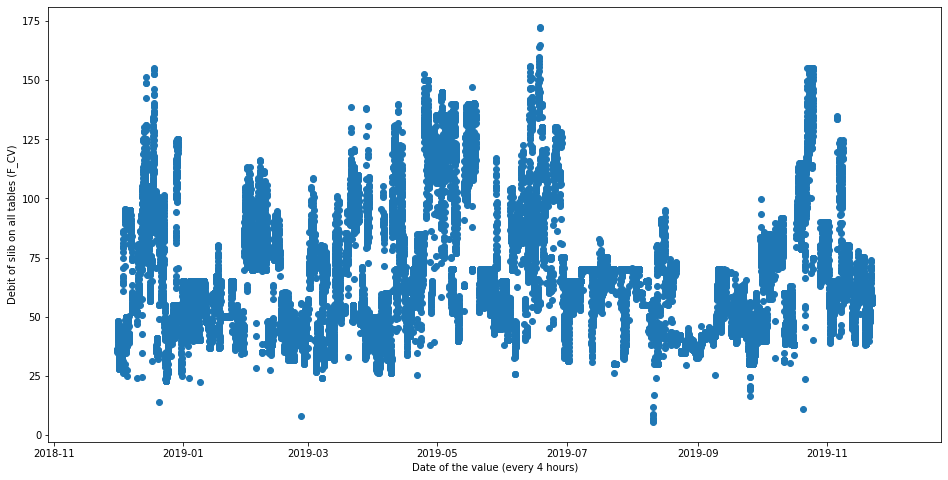

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(slibWerkbaar.index, slibWerkbaar.TotaalSlibOpTafels)
ax.set_ylabel('Debit of slib on all tables (F_CV)')
ax.set_xlabel('Date of the value (every 4 hours)')
plt.show()

In [39]:
slibWerkbaar = slibWerkbaar.dropna()

In [40]:
slibWerkbaar.describe()

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
count,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,2.878400e+04,28784.000000
mean,65.769635,941.246757,44.990648,67.923021,5.116841,107.452713,64.029472,55.281826,784.654234,45.019245,5.070978e+00,67.870323
std,24.787429,407.298275,1.450818,1.373625,9.312256,36.430582,1.229670,32.572740,501.484795,1.632170,9.264390e+00,2.264908
min,5.500000,0.000000,38.362662,1.024994,0.000000,25.383333,57.263268,0.000000,0.000000,0.000000,-1.184238e-16,0.000000
25%,47.000000,631.112500,44.295832,67.952494,0.000000,78.591071,63.497435,40.000000,516.404167,44.256573,0.000000e+00,67.953994
50%,61.300000,803.961782,45.095057,67.997992,0.000000,103.041667,64.090159,55.800000,718.363823,45.108661,0.000000e+00,67.998327
75%,76.666667,1210.208333,45.919204,68.037325,6.100000,133.112500,64.743990,71.400000,1102.767130,46.013203,5.966667e+00,68.036324
max,172.566667,2431.965517,50.600006,97.076658,36.250000,223.625000,68.116832,172.566667,2428.683333,50.639984,3.625000e+01,97.076658


In [41]:
#def normalize(df):
#    result = df.copy()
#    for feature_name in df.columns:
#        max_value = df[feature_name].max()
#        min_value = df[feature_name].min()
#        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#    return result

In [42]:
#temporary_X = slibWerkbaar.drop(['DebietGasproductie', 'MethaangasGehalte', 'DebietSpuiSlib', 'VermogenCompressor'],axis=1)
#normalised_X = normalize(temporary_X)
#outputs = slibWerkbaar[['DebietGasproductie', 'MethaangasGehalte']]
#slibWerkbaar = pd.concat([normalised_X, outputs], axis=1)

In [43]:
X = slibWerkbaar.drop(['DebietGasproductie', 'MethaangasGehalte'],axis=1)
y = slibWerkbaar['DebietGasproductie']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [44]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
poly = PolynomialFeatures(degree=3)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
for i in range(1, 3):

    poly = PolynomialFeatures(degree=i)

    X_train_transform = poly.fit_transform(X_train)

    X_test_transform = poly.fit_transform(X_test)

    model = LinearRegression()

    model.fit(X_train_transform,y_train)

    y_predict = model.predict(X_test_transform)

    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))

    print('Root Mean Squared Error for i = ' + str(i) + ' is ' + str(RMSE))

    print()

Root Mean Squared Error for i = 1 is 30.016830857671096

Root Mean Squared Error for i = 2 is 27.827767495536044



In [46]:
#To retrieve the intercept:

print("Intercept")

print(model.intercept_)

print()

#For retrieving the coefficients:

print("Coefficients")

print(model.coef_)

print()

Intercept
-6096.098431426403

Coefficients
[ 3.72292021e-10  1.27752716e+01  4.04970521e-01  1.83852515e+02
  3.54560297e+01  2.00470785e+00  6.87891738e+00 -4.42236016e-01
  6.02829105e+01  3.06865786e+00 -3.21682142e+01  2.51346916e-03
 -8.82068765e-05 -9.46954474e-02 -5.03489887e-03  4.48148336e-03
  6.11992344e-03 -6.20967979e-04 -1.87713247e-01 -6.52388825e-04
  2.87111820e-03 -2.60544052e-05 -2.20276568e-03 -3.64506283e-03
  7.90208049e-05 -8.18716989e-04  6.33693237e-05  4.82796018e-04
 -1.50839670e-05  1.78149914e-04 -1.36427396e+00 -6.18222304e-01
  6.94108616e-02  2.20511663e-02  3.07243600e-03 -6.80536290e-01
 -1.60274409e-02  1.90793055e-01 -3.97757758e-02  6.79733298e-03
 -3.40919661e-02  1.59395760e-03 -2.63717175e-01 -1.33535615e-01
  2.20962678e-01 -2.61531761e-03 -3.93962942e-03  4.03360098e-04
 -1.04238670e-01 -3.18762271e-02 -5.51739970e-04 -3.90081117e-03
  5.20807317e-04 -1.06596279e-01  5.95077066e-03 -9.37042445e-03
 -1.25403398e-05  3.41998548e-03 -4.10918297e-0

In [47]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 21.882681763320143

Mean Squared Error: 774.3846437856123

Root Mean Squared Error: 27.827767495536044

R square: 0.41397288220192097



In [48]:
#arr = np.full((567), slibWerkbaar.DebietGasproductie.mean())
#MAE = metrics.mean_absolute_error(y_test,arr)
#print(MAE)
#RMSE = np.sqrt(metrics.mean_squared_error(y_test,arr))
#print('Root Mean Squared Error: '+ str(RMSE))
#print()

#r2 = metrics.r2_score(y_test,arr)
#print('R square: ' + str(r2))  

In [49]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)

print('Mean Absolute Error: '+ str(MAE))
r2 = metrics.r2_score(y_test,y_predict)

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

print('R square: ' + str(r2))  

Mean Absolute Error: 10.99779965729547
Mean Squared Error: 226.77595388990736

Root Mean Squared Error: 15.05908210648668

R square: 0.8283839178494804


In [50]:
print(X_train.columns)
print(model.feature_importances_)

pd.DataFrame(model.feature_importances_,columns=['Importance'],index=X_train.columns).sort_values(by='Importance',ascending=False)

Index(['TotaalSlibOpTafels', 'TotaalPENaarTafels', 'TemperatuurTank', 'DebietSlibCirculatie', 'VermogenCompressor', 'TotaalSlibOpTafels9D', 'TotaalPENaarTafels9D', 'TemperatuurTank9D', 'VermogenCompressor9D', 'DebietSlibCirculatie9D'], dtype='object')
[0.08986196 0.37389573 0.13291665 0.02750721 0.07108846 0.05685474
 0.11342938 0.09256437 0.02006766 0.02181383]


,Importance
TotaalPENaarTafels,0.373896
TemperatuurTank,0.132917
TotaalPENaarTafels9D,0.113429
TemperatuurTank9D,0.092564
TotaalSlibOpTafels,0.089862
VermogenCompressor,0.071088
TotaalSlibOpTafels9D,0.056855
DebietSlibCirculatie,0.027507
DebietSlibCirculatie9D,0.021814
VermogenCompressor9D,0.020068


In [51]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
Tijdsas,,
2019-11-19 18:15:00+01:00,102.083333,107.967834
2019-03-15 08:30:00+01:00,156.866667,150.949695
2019-03-10 20:15:00+01:00,74.033333,83.124816
2019-09-10 19:45:00+02:00,54.133333,48.500941
2019-03-13 18:30:00+01:00,191.316667,158.062185
...,...,...
2019-10-11 01:15:00+02:00,120.366667,127.126489
2019-04-22 00:30:00+02:00,84.716667,93.240400
2019-11-02 05:30:00+01:00,122.366667,109.910104


In [52]:
df['Difference'] = np.abs(y_test - y_predict)
df

,Actual,Predicted,Difference
Tijdsas,,,
2019-11-19 18:15:00+01:00,102.083333,107.967834,5.884501
2019-03-15 08:30:00+01:00,156.866667,150.949695,5.916972
2019-03-10 20:15:00+01:00,74.033333,83.124816,9.091483
2019-09-10 19:45:00+02:00,54.133333,48.500941,5.632393
2019-03-13 18:30:00+01:00,191.316667,158.062185,33.254481
...,...,...,...
2019-10-11 01:15:00+02:00,120.366667,127.126489,6.759822
2019-04-22 00:30:00+02:00,84.716667,93.240400,8.523733
2019-11-02 05:30:00+01:00,122.366667,109.910104,12.456562


In [53]:
df.describe()

,Actual,Predicted,Difference
count,8636.000000,8636.000000,8636.000000
mean,107.230252,107.319548,10.997800
std,36.353368,31.279578,10.287692
min,25.383333,37.627492,0.002711
25%,78.483333,81.654949,3.706506
50%,102.800000,104.906901,8.179491
75%,132.487500,128.714862,15.154762
max,214.916667,195.515565,114.988492


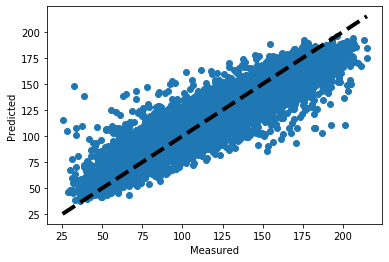

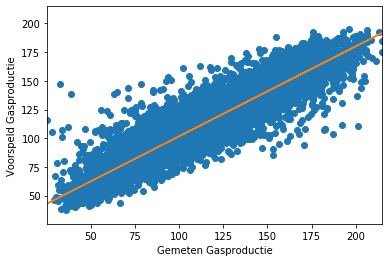

In [54]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

plt.plot(y_test, y_predict, 'o')
plt.axis([y_test.min(), y_test.max(), y_test.min(), y_test.max()])
plt.ylabel('Voorspeld Gasproductie')
plt.xlabel('Gemeten Gasproductie')
m, b = np.polyfit(y_test, y_predict, 1)
plt.plot(y_test, m*y_test + b)

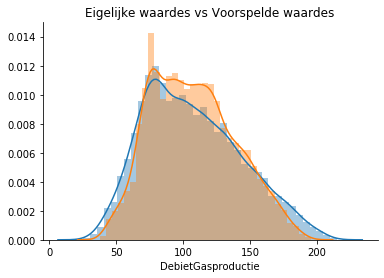

In [55]:
sns.distplot(y_test, label="Eigelijke waardes")
plt.title("Eigelijke waardes vs Voorspelde waardes")
sns.despine()
sns.distplot(y_predict)
sns.despine()

Text(0.5, 1.0, 'absolute waarde van verschil tussen eigelijke en voorspelde waardes')

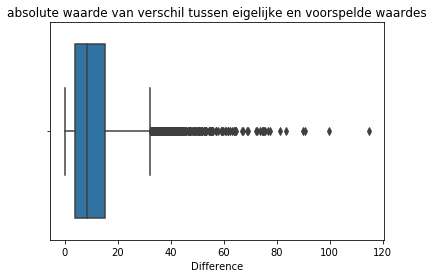

In [56]:
sns.boxplot(df.Difference)
plt.title("absolute waarde van verschil tussen eigelijke en voorspelde waardes")

In [57]:
X = slibWerkbaar.drop(['DebietGasproductie', 'MethaangasGehalte'],axis=1)
y = slibWerkbaar['MethaangasGehalte']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

poly = PolynomialFeatures(degree=1)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
#To retrieve the intercept:

print("Intercept")

print(model.intercept_)

print()

#For retrieving the coefficients:

print("Coefficients")

print(model.coef_)

print()

Intercept
76.82593447648334

Coefficients
[ 0.00000000e+00 -1.06246111e-02  9.74837776e-04 -3.07948840e-01
  3.95970126e-02  6.35410913e-03 -4.46942148e-03  1.14026211e-04
 -5.39870798e-02  6.28551003e-03  9.99487503e-03]



In [59]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 0.7695917117976306

Mean Squared Error: 1.2165648443783634

Root Mean Squared Error: 1.102979983670766

R square: 0.23683987666412065



In [60]:
#arr = np.full((567), slibWerkbaar.MethaangasGehalte.mean())
#MAE = metrics.mean_absolute_error(y_test,arr)
#print(MAE)
#RMSE = np.sqrt(metrics.mean_squared_error(y_test,arr))
#print('Root Mean Squared Error: '+ str(RMSE))
#print()

#r2 = metrics.r2_score(y_test,arr)
#print('R square: ' + str(r2))  

In [61]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)

print('Mean Absolute Error: '+ str(MAE))
r2 = metrics.r2_score(y_test,y_predict)

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()
print('R square: ' + str(r2)) 

Mean Absolute Error: 0.2717127355837921
Mean Squared Error: 0.16086782552461465

Root Mean Squared Error: 0.4010833149416897

R square: 0.899086423436088


In [62]:
print(X_train.columns)
print(model.feature_importances_)
pd.DataFrame(model.feature_importances_,columns=['Importance'],index=X_train.columns).sort_values(by='Importance',ascending=False)

Index(['TotaalSlibOpTafels', 'TotaalPENaarTafels', 'TemperatuurTank', 'DebietSlibCirculatie', 'VermogenCompressor', 'TotaalSlibOpTafels9D', 'TotaalPENaarTafels9D', 'TemperatuurTank9D', 'VermogenCompressor9D', 'DebietSlibCirculatie9D'], dtype='object')
[0.10925041 0.21669212 0.22464788 0.01217741 0.01334773 0.10737878
 0.12851389 0.15841445 0.01637478 0.01320254]


,Importance
TemperatuurTank,0.224648
TotaalPENaarTafels,0.216692
TemperatuurTank9D,0.158414
TotaalPENaarTafels9D,0.128514
TotaalSlibOpTafels,0.109250
TotaalSlibOpTafels9D,0.107379
VermogenCompressor9D,0.016375
VermogenCompressor,0.013348
DebietSlibCirculatie9D,0.013203
DebietSlibCirculatie,0.012177


In [63]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
Tijdsas,,
2019-08-08 20:15:00+02:00,62.424159,62.703532
2019-03-30 15:15:00+01:00,63.732324,63.792955
2019-07-21 01:15:00+02:00,63.208325,63.378380
2019-04-27 23:00:00+02:00,64.279879,64.062133
2019-08-02 23:45:00+02:00,64.220823,64.319366
...,...,...
2019-04-18 14:30:00+02:00,64.375660,64.118828
2019-02-27 10:30:00+01:00,64.481822,64.112466
2019-04-29 18:45:00+02:00,65.034989,64.749402


In [64]:
df['Difference'] = np.abs(y_test - y_predict)
df

,Actual,Predicted,Difference
Tijdsas,,,
2019-08-08 20:15:00+02:00,62.424159,62.703532,0.279372
2019-03-30 15:15:00+01:00,63.732324,63.792955,0.060631
2019-07-21 01:15:00+02:00,63.208325,63.378380,0.170056
2019-04-27 23:00:00+02:00,64.279879,64.062133,0.217746
2019-08-02 23:45:00+02:00,64.220823,64.319366,0.098543
...,...,...,...
2019-04-18 14:30:00+02:00,64.375660,64.118828,0.256832
2019-02-27 10:30:00+01:00,64.481822,64.112466,0.369356
2019-04-29 18:45:00+02:00,65.034989,64.749402,0.285586


In [65]:
slibWerkbaar.describe()

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
count,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,2.878400e+04,28784.000000
mean,65.769635,941.246757,44.990648,67.923021,5.116841,107.452713,64.029472,55.281826,784.654234,45.019245,5.070978e+00,67.870323
std,24.787429,407.298275,1.450818,1.373625,9.312256,36.430582,1.229670,32.572740,501.484795,1.632170,9.264390e+00,2.264908
min,5.500000,0.000000,38.362662,1.024994,0.000000,25.383333,57.263268,0.000000,0.000000,0.000000,-1.184238e-16,0.000000
25%,47.000000,631.112500,44.295832,67.952494,0.000000,78.591071,63.497435,40.000000,516.404167,44.256573,0.000000e+00,67.953994
50%,61.300000,803.961782,45.095057,67.997992,0.000000,103.041667,64.090159,55.800000,718.363823,45.108661,0.000000e+00,67.998327
75%,76.666667,1210.208333,45.919204,68.037325,6.100000,133.112500,64.743990,71.400000,1102.767130,46.013203,5.966667e+00,68.036324
max,172.566667,2431.965517,50.600006,97.076658,36.250000,223.625000,68.116832,172.566667,2428.683333,50.639984,3.625000e+01,97.076658


In [66]:
df.describe()

,Actual,Predicted,Difference
count,8636.000000,8636.000000,8636.000000
mean,64.022746,64.029130,0.271713
std,1.262656,1.133016,0.295043
min,57.611993,57.921510,0.000026
25%,63.471095,63.583148,0.088885
50%,64.105994,64.108840,0.194850
75%,64.771179,64.645953,0.354954
max,68.113164,67.500211,4.932839


Text(0.5, 1.0, 'absolute waarde van verschil tussen eigelijke en voorspelde waardes')

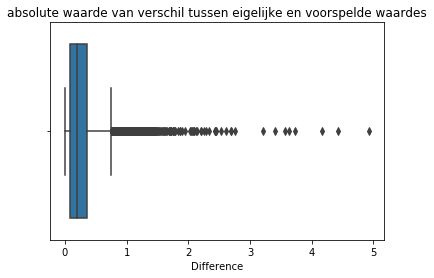

In [67]:
sns.boxplot(df.Difference)
plt.title("absolute waarde van verschil tussen eigelijke en voorspelde waardes")

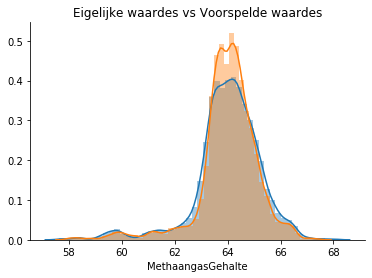

In [68]:
sns.distplot(y_test, label="Eigelijke waardes")
plt.title("Eigelijke waardes vs Voorspelde waardes")
sns.despine()
sns.distplot(y_predict)
sns.despine()

#orange = predicted, blue = actual

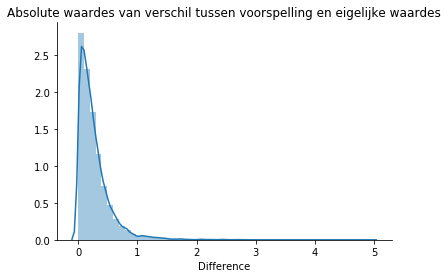

In [69]:
sns.distplot(df.Difference)
plt.title("Absolute waardes van verschil tussen voorspelling en eigelijke waardes")
sns.despine()

In [70]:
df.describe()

,Actual,Predicted,Difference
count,8636.000000,8636.000000,8636.000000
mean,64.022746,64.029130,0.271713
std,1.262656,1.133016,0.295043
min,57.611993,57.921510,0.000026
25%,63.471095,63.583148,0.088885
50%,64.105994,64.108840,0.194850
75%,64.771179,64.645953,0.354954
max,68.113164,67.500211,4.932839


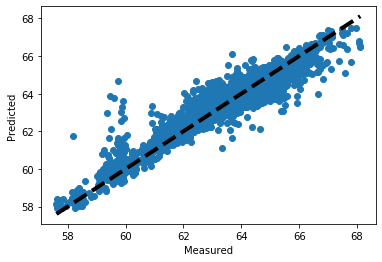

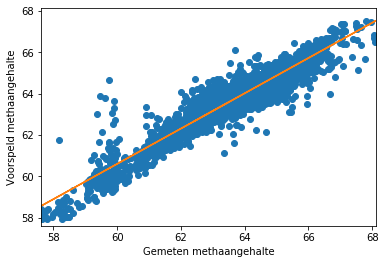

In [71]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

plt.plot(y_test, y_predict, 'o')
plt.axis([y_test.min(), y_test.max(), y_test.min(), y_test.max()])
plt.ylabel('Voorspeld methaangehalte')
plt.xlabel('Gemeten methaangehalte')
m, b = np.polyfit(y_test, y_predict, 1)
plt.plot(y_test, m*y_test + b)

In [72]:
slibWerkbaar

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
Tijdsas,,,,,,,,,,,,
2018-12-01 00:00:00+01:00,36.466667,528.233333,44.603165,68.002325,0.000000,107.283333,63.676659,0.0,0.200000,46.014827,18.233333,68.012658
2018-12-01 00:15:00+01:00,35.933333,527.450000,44.613663,67.994660,0.000000,116.483333,63.440993,0.0,0.366667,46.626662,26.000000,68.002490
2018-12-01 00:30:00+01:00,36.034483,527.982759,44.597754,67.998613,0.000000,129.362069,63.168786,0.0,0.172414,46.591374,26.000000,67.990681
2018-12-01 00:45:00+01:00,34.933333,521.100000,44.602331,67.985326,0.000000,132.516667,62.960827,0.0,0.233333,46.524326,26.000000,68.007324
2018-12-01 01:00:00+01:00,34.866667,525.733333,44.611495,68.006990,0.000000,136.416667,62.807659,0.0,0.250000,46.583494,7.800000,68.016993
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-21 22:45:00+01:00,56.066667,706.816667,46.233829,67.912991,0.000000,112.500000,63.985714,0.0,0.200000,43.093325,0.000000,68.010991
2019-11-21 23:00:00+01:00,55.966667,692.233333,46.491995,67.980993,0.000000,107.516667,63.823439,0.0,0.300000,43.349493,0.000000,68.004326
2019-11-21 23:15:00+01:00,57.793103,694.258621,46.287234,67.955507,0.000000,107.086207,63.665798,0.0,0.425287,43.106890,0.000000,67.947921


In [73]:
slibWerkbaar.describe()

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,DebietGasproductie,MethaangasGehalte,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D
count,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,2.878400e+04,28784.000000
mean,65.769635,941.246757,44.990648,67.923021,5.116841,107.452713,64.029472,55.281826,784.654234,45.019245,5.070978e+00,67.870323
std,24.787429,407.298275,1.450818,1.373625,9.312256,36.430582,1.229670,32.572740,501.484795,1.632170,9.264390e+00,2.264908
min,5.500000,0.000000,38.362662,1.024994,0.000000,25.383333,57.263268,0.000000,0.000000,0.000000,-1.184238e-16,0.000000
25%,47.000000,631.112500,44.295832,67.952494,0.000000,78.591071,63.497435,40.000000,516.404167,44.256573,0.000000e+00,67.953994
50%,61.300000,803.961782,45.095057,67.997992,0.000000,103.041667,64.090159,55.800000,718.363823,45.108661,0.000000e+00,67.998327
75%,76.666667,1210.208333,45.919204,68.037325,6.100000,133.112500,64.743990,71.400000,1102.767130,46.013203,5.966667e+00,68.036324
max,172.566667,2431.965517,50.600006,97.076658,36.250000,223.625000,68.116832,172.566667,2428.683333,50.639984,3.625000e+01,97.076658


In [74]:
X_test['Results'] = y_test


C:\Users\bramv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
X_test

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D,Results
Tijdsas,,,,,,,,,,,
2019-08-08 20:15:00+02:00,49.933333,429.983333,46.817995,68.079323,0.000000,55.833333,1137.850000,46.220494,4.000000,68.082325,62.424159
2019-03-30 15:15:00+01:00,41.833333,872.461111,45.605995,67.998992,20.700000,32.666667,872.755556,45.304493,22.433333,67.833327,63.732324
2019-07-21 01:15:00+02:00,70.100000,650.975000,46.173162,67.889991,0.000000,70.033333,743.958333,44.007774,0.000000,67.865159,63.208325
2019-04-27 23:00:00+02:00,114.866667,1497.450000,44.271493,67.984991,0.000000,127.233333,1806.966667,44.555659,0.000000,68.104659,64.279879
2019-08-02 23:45:00+02:00,69.966667,703.175000,41.761990,68.033991,0.000000,38.733333,383.358333,45.733828,0.000000,68.015658,64.220823
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-18 14:30:00+02:00,53.466667,656.450000,44.563328,68.063826,16.833333,0.000000,0.466667,44.655494,27.883333,67.959825,64.375660
2019-02-27 10:30:00+01:00,48.833333,748.416667,46.630995,68.040994,0.000000,66.733333,1400.916667,45.138493,0.000000,67.881658,64.481822
2019-04-29 18:45:00+02:00,115.633333,1260.216667,44.371489,68.036489,0.000000,92.200000,1845.166667,44.990829,0.000000,67.952992,65.034989


In [76]:
X_test[X_test['Results'] > 65].TemperatuurTank.mean()


43.73151356038919

In [77]:
X_test[X_test['Results'] > 68.130004].describe()

,TotaalSlibOpTafels,TotaalPENaarTafels,TemperatuurTank,DebietSlibCirculatie,VermogenCompressor,TotaalSlibOpTafels9D,TotaalPENaarTafels9D,TemperatuurTank9D,VermogenCompressor9D,DebietSlibCirculatie9D,Results
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
testParDF = X_test[X_test['Results'] > 68.130004]

In [79]:
#0.6264021 = normalized 44.9711982
arr= {
    'TotaalSlibOpTafels' : [testParDF.TotaalSlibOpTafels],
    'TotaalPENaarTafels' : [testParDF.TotaalPENaarTafels],
    'TemperatuurTank' : [testParDF.TemperatuurTank] ,
    'DebietSpuiSlib' : [testParDF.DebietSpuiSlib],
    'DebietSlibCirculatie' : [testParDF.DebietSlibCirculatie],
    'VermogenCompressor' : [testParDF.VermogenCompressor],
    'DebietSpuiSlibShift9D' : [testParDF.DebietSlibCirculatie9D],
    'TotaalSlibOpTafels9D' : [testParDF.TotaalSlibOpTafels9D],
    'TotaalPENaarTafels9D' : [testParDF.TotaalPENaarTafels9D],
    'TemperatuurTank9D' : [testParDF.TemperatuurTank9D],
    'VermogenCompressor9D' : [testParDF.VermogenCompressor9D],
    'DebietSlibCirculatie9D' : [testParDF.DebietSlibCirculatie9D],
     }
testPred = pd.DataFrame(data = arr)
resulty = model.predict(testPred)
resulty

AttributeError: 'DataFrame' object has no attribute 'DebietSpuiSlib'

In [ ]:
X_test

In [ ]:
resulty

In [ ]:
print((35.500000)  + 0.6356021* (50.619995 - 35.5000))